In [1]:
#Supplementary plots and assocaited analysis
import pandas as pd
import numpy as np
#import datetime as dt
import os
#from collections import Counter
import seaborn as sns
import math
import glob
#from scipy.stats import linregress
#from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None #ignore the warming
%matplotlib inline

In [ ]:
#Plot S1 - CIMMYT Mega Environment - ArcGIS

In [ ]:
#Plot S2 - Median temperature change across trial sites under different scenario and historical observation

In [2]:
ssp=['126','370','585']
nursery=['ESWYT','HTWYT','IDYN','SAWYT','IWWYT_IRR','IWWYT_SA']
data_dir="E:\\Works\\IWIN\\climate\\"
clim='tavg'#['tavg','tdr','gdd30','rs','p','rh','vpd','ws','co2']
for n in range(len(nursery)):
    df=pd.read_csv(data_dir+nursery[n]+".csv")
    #calculate the mean for projected historical climate - 1981-2010
    his=df[df.sce.isin(['ar_h','gf_h','ip_h','mk_h','mp_h','mr_h'])]
    his=his[(his.year>1980) & (his.year<2011)]
    his=his.iloc[:,1:].groupby(by=['loc','sce']).mean().reset_index()
    his['sce1']=[x[:2] for x in his['sce']]
    his=his[['loc','sce1','tavg']]
    #Future
    fut=df[df.sce.isin(list(set(df.sce.unique().tolist())-set(['gf_h','ip_h','mk_h','mp_h','mr_h'])))]
    fut['sce1']=fut.sce.str[:2]
    fut=fut[['year','tavg','sce','loc','sce1']]
    fut=fut.merge(his,on=['loc','sce1'],how='inner')
    fut['tavg']=fut['tavg_x']-fut['tavg_y']
    fut['ssp']=fut.sce.str[3:]
    fut=fut[['year','sce1','ssp','loc','tavg']]
    fut['nursery']=nursery[n]
    if n==0:
        out=fut
    else:
        out=pd.concat([out,fut],axis=0)
#df=out[(out.year>2010)&(out.sce1!='ar')]
#df=df[['year','ssp','sce1','nursery','tavg']].groupby(by=['ssp','year','nursery']).median().reset_index()

In [33]:
#ARC historical change
df=out[(out.year>2010)&(out.sce1=='ar')]
df=df[['year','tavg']].groupby(by=['year']).median().reset_index()
df.tavg.mean()
#print("temperature increase for year 2011-2020 is"+str(df.tavg.mean))

0.2614771261165501

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11960\3461414852.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df[['year','ssp','sce1','nursery','tavg']].groupby(by=['ssp','year','nursery']).median().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11960\3461414852.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df0=df0[['year','ssp','sce1','nursery','tavg']].groupby(by=['ssp','year','nursery']).median().reset_index()


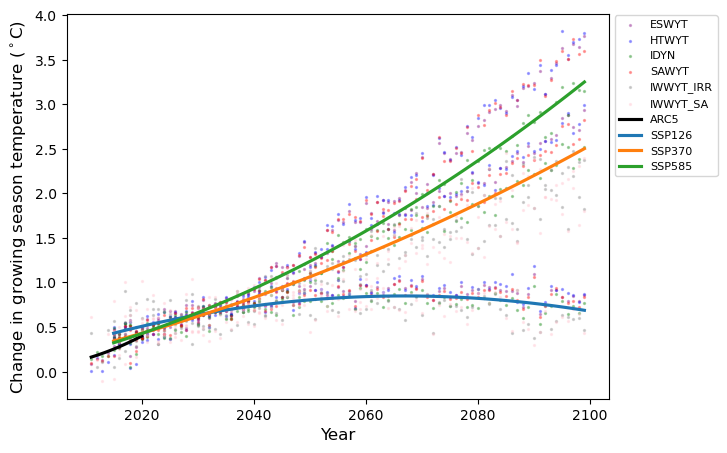

In [48]:
fig_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\0_Adaptation\\6_Plots\\"
colors=['purple','blue','green','red','grey','pink']
ssp=['SSP126','SSP370','SSP585']
fig, ax= plt.subplots(figsize=(7,5))
df=out[(out.year>2010)&(out.sce1=='ar')]
df=df[['year','ssp','sce1','nursery','tavg']].groupby(by=['ssp','year','nursery']).median().reset_index()
#colors = {'ESWYT':'purple','IDYN':'blue', 'IWWYT_IRR':'green', 'HTWYT':'red', 'SAWYT':'grey','IWWYT_SA':'pink'}
for n in range(6):
    df1=df[df.nursery==nursery[n]]
    ax.scatter(df1.year,df1.tavg,alpha=0.3,s=2,c=colors[n])
df0=out[out.sce1 != 'ar']
df0=df0[['year','ssp','sce1','nursery','tavg']].groupby(by=['ssp','year','nursery']).median().reset_index()
for n in range(6):
    df1=df0[df0.nursery==nursery[n]]
    ax.scatter(df1.year,df1.tavg,alpha=0.3,s=2,label=nursery[n],c=colors[n])
df1=df[df.ssp=='h']
sns.regplot(data=df1,x='year',y='tavg',scatter=False,order=2,ci=0.95,ax=ax,color='black',label='ARC5')
for s in range(3):
    df1=df0[df0.ssp==ssp[s][3]]
    sns.regplot(data=df1,x='year',y='tavg',scatter=False,order=2,ci=0.95,ax=ax,label=ssp[s])
plt.legend(fontsize=8,bbox_to_anchor=(1, 0.61, 0.06, 0.4))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Change in growing season temperature ($^\circ$C)',fontsize=12)
fig.savefig(fig_dir+'Plot_S_ChangeInGrowingSeasonT.png',dpi=300,bbox_inches="tight")